# Q1-4.ランダムに動く

## 問題
**Q1-4.3秒に1回パン、チルトで-0.5rad~0.5radのランダムな角度を２つ作り、その方向を向くコードを書きましょう。**

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

### ここから問題  ###

"""(コードを記述)”"""

### ここまで  ###

ここまで学習した関数を使って、ランダムな方向を向くコードを書いてみましょう。  
今回は今までのコードを参照しながら、１からアプリを作ってみましょう。

### 動作イメージ

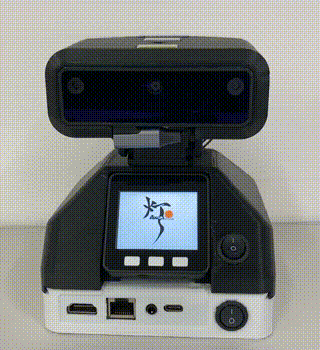

In [1]:
from IPython.display import Image
Image('image/q1-4.gif')

### ヒント

**Q1-3の回答を参考に書くのがいいでしょう。**  

[Q1-3](q1-3_bow.ipynb)では、下30°を向く→3秒待つ→上20°を向く→3秒待つまでが1ループでした。  
今回は、パンの角度の乱数とチルトの角度の乱数を作る→作った方向を向く→3秒待つ、が1ループです。

**ランダムな数を生成するには、random.uniform()という関数を使います。**

random.uniform(min,max)の引数minが下限値, maxが上限値です。  
この範囲内の乱数が返り値となります。  
uniform()はrandomモジュールに含まれるので、先にrandomモジュールをimportします。  

下記のセルを実行すると使い方の例が見られます。

In [ ]:
import random
val = random.uniform(-5, 5)
print("乱数 " + str(val) + " を生成しました。")

これを2回使って、パン用の乱数とチルト用の乱数を作りましょう。

完成したら実行してみましょう。  
正しく書けていれば、AKARIのヘッドが3秒に１回ランダムな方向を向く挙動を繰り返します。

## 回答と解説
以下は回答例と解説です。動作が正しければ、これと同じでなくても問題ありません。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

### ここから問題  ###

# sleep関数を使うためにtimeのライブラリをインポートする。
import time
# 乱数生成用のライブラリをインポートする。
import random
# モータ制御の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient

# AkariClientのインスタンスを作成する。
akari = AkariClient()
# 関節制御用のインスタンスを取得する。
joints = akari.joints
# サーボONにする。
joints.enable_all_servo()

while(True):
    # -0.5~0.5のランダムな角度をpan,tiltそれぞれ生成
    pan_angle = random.uniform(-0.5, 0.5)
    tilt_angle = random.uniform(-0.5, 0.5)
    # 問題文に指定はないが、一応print。
    print("pan: " + str(pan_angle) + "tilt: " + str(tilt_angle))
    # 生成したランダムな方向を向く
    joints.move_joint_positions(pan=pan_angle, tilt=tilt_angle)
    # 3秒停止する
    time.sleep(3)

### ここまで  ###

#### 6-11行目:
```python
# sleep関数を使うためにtimeのライブラリをインポートする。
import time
# 乱数生成用のライブラリをインポートする。
import random
# モータ制御の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
```
最初に必要なモジュールをインポートします。  
1つ目はsleepを使うために必要なtime  
2つ目はuniformを使うために必要なrandom  
3つ目はAKARIのヘッドを動かすのに必要なAkariClientです。

#### 13-16行目:

```python
# AkariClientのインスタンスを作成する。
akari = AkariClient()
# 関節制御用のインスタンスを取得する。
joints = akari.joints
```

AkariController()のインスタンスを _akari_ という名前で  
akari.jointsのインスタンスを _joints_ という名前で作成します。

#### 17-18行目
```python
# サーボONにする。
joints.enable_all_servo()
```

全サーボを有効状態にする関数を呼び出します。  

#### 20行目:

```python
while(True):
```

3秒に１回動作するコードなので、while()でループさせます。  
条件式はTrueなので、終了するまでループし続けます。

#### 21-23行目:
```python
# -0.5~0.5のランダムな角度をpan,tiltそれぞれ生成
pan_angle = random.uniform(-0.5, 0.5)
tilt_angle = random.uniform(-0.5, 0.5)
```
pan_angleでpan方向の乱数、tilt_angleでtilt方向の乱数を作成します。  
乱数生成はrandom.uniform(min,max)を使います。-0.5~0.5なので、minが-0.5でmaxが0.5です。

#### 24-25行目:

```python
# 問題文に指定はないが、一応print。
print("pan: " + str(pan_angle) + "tilt: " + str(tilt_angle))
```

特に指定はないですが、21-23行目で作成した乱数をコマンドラインに表示しておきます。  
str(数値)で数値を文字列に変換できます。文字列どうしであれば + で結合できるので、一つの文字列としてprintできます。


#### 26-27行目:

```python
# 生成したランダムな方向を向く
joints.move_joint_positions(pan=pan_angle, tilt=tilt_angle)
```

[Q1-1](q1-1_joints_name.ipynb)や[Q1-3](q1-3_bow.ipynb)と同じ方法で、指令値を引数に渡して _move_joint_positions()で指令します。  
panとtilt同時に動かすので、 _pan=_ と _tilt=_ にはそれぞれ作成した乱数 _pan_angle_ , _tilt_angle_ を与えます。


#### 28-29行目:

```python
# 3秒停止する
time.sleep(3)
```

3秒に1回動かすので、ここでは3秒のsleepを入れます。

## 最後に
これでQ1-4は終了です。  
次は、ボタン入力の取得を学習してみましょう。

[次の問題へ](q2-1_button.ipynb)